In [330]:
# !pip install xgboost

In [331]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectFromModel, SelectKBest, chi2
from sklearn.linear_model import Lasso
# import xgboost as xgb
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from typing import List, Dict,Tuple,Any
from scipy.stats import chi2_contingency
import scipy.stats as stats

# Pipeline imports
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

#import LogisticRegression
from sklearn.linear_model import LogisticRegression
#import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import TransformerMixin
#impory accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

import pickle

from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectFromModel, SelectKBest, chi2
from sklearn.model_selection import train_test_split

#ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [332]:
#list names of all files
os.listdir('data')


['leads.csv',
 'rates_land.csv',
 'rates_sea.csv',
 'merged_leads_land_not_null.csv',
 'rates_air.csv']

In [333]:
#read the data
list_of_files = os.listdir('data')
exlude_files = ['merged_leads_land_not_null.csv']
list_of_files = [file for file in list_of_files if file not in exlude_files]
leads,  land, sea, air = [pd.read_csv('data/' + file) for file in list_of_files]

In [334]:
leads


,request_id,request_date,valid_date_from,valid_date_to,weight,weight_unit,amount,container_type,shipping_type,hs_code,...,liquid_cargo,imo_code,city_from_country,city_from,port_from_country,port_from,port_to_country,port_to,city_to_country,city_to
0,855641,2023-09-05,2023-09-16,2023-09-23,26.63,Metric Ton,1.0,40' Refrigerated,FCL,06-14,...,False,NaN,NaN,NaN,ID,Jakarta,BD,Chittagong,NaN,NaN
1,855652,2023-09-05,2023-09-30,2023-10-07,28.00,Metric Ton,1.0,20' Standard,FCL,25-27,...,False,NaN,NaN,NaN,BR,Vitoria,US,Houston,US,"Houston, TX, USA"
2,855664,2023-09-05,2023-09-05,2023-09-12,200.00,Metric Ton,1.0,20' Standard,FCL,NaN,...,False,NaN,NaN,NaN,CN,Chengdu,DO,Caucedo,DO,Dominican Republic
3,855689,2023-09-05,2023-09-30,2023-10-07,26.00,Metric Ton,20.0,40' Standard,FCL,0910,...,False,NaN,NaN,NaN,NG,Apapa,AE,Jebel Ali,AE,Mina Jebel Ali - Dubai - United Arab Emirates
4,855725,2023-09-05,2023-09-20,2023-09-27,250.00,Metric Ton,NaN,NaN,LCL,8711,...,False,NaN,NaN,NaN,IN,Chennai,DE,FRANKFURT AM MAIN,DE,"Frankfurt, Germany"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9893,941678,2024-03-05,2024-06-09,2024-06-16,30.00,Kilogram,NaN,NaN,LCL,NaN,...,False,NaN,IT,"Padua, Province of Padua, Italy",IT,Venice,CA,Toronto,CA,"Toronto, ON, Canada"
9894,941682,2024-03-05,2024-03-05,2024-03-12,28.23,Metric Ton,1.0,20' Standard,FCL,94-96,...,False,NaN,NaN,NaN,BR,Rio De Jan Eiro,SG,Singapore,NaN,NaN
9895,941683,2024-03-05,2024-06-09,2024-06-09,310.00,Kilogram,NaN,NaN,LCL,NaN,...,False,NaN,IT,"Padua, Province of Padua, Italy",IT,Venice,CA,Toronto,CA,"Toronto, ON, Canada"
9896,941687,2024-03-05,2024-04-06,2024-04-13,28.00,Metric Ton,1.0,20' Standard,FCL,50-63,...,False,NaN,ZA,"Cape Town City Centre, Cape Town, 8000, South ...",ZA,Cape Town,US,Charleston,NaN,NaN


In [335]:
air


,create_date,point_id,valid_from,valid_to,carrier,estimated_days,origin_country,origin_name,origin_code,destination_country,destination_name,destination_code,shipping_type,load_type,load_amount,price_usd
0,2024-02-27,19016428,2024-02-01,2024-04-30,Turkish Airlines,3.0,BR,Guarulhos Gov Andre Franco Montouro,SBGR,OM,Seeb Intl,OOMS,AIR,kg,1000,2550.0
1,2024-02-27,19016428,2024-02-01,2024-04-30,Turkish Airlines,3.0,BR,Guarulhos Gov Andre Franco Montouro,SBGR,OM,Seeb Intl,OOMS,AIR,kg,1500,3825.0
2,2024-02-27,19016428,2024-02-01,2024-04-30,Turkish Airlines,3.0,BR,Guarulhos Gov Andre Franco Montouro,SBGR,OM,Seeb Intl,OOMS,AIR,kg,2000,5100.0
3,2024-02-27,19016428,2024-02-01,2024-04-30,Turkish Airlines,3.0,BR,Guarulhos Gov Andre Franco Montouro,SBGR,OM,Seeb Intl,OOMS,AIR,kg,2500,6375.0
4,2024-02-27,19016428,2024-02-01,2024-04-30,Turkish Airlines,3.0,BR,Guarulhos Gov Andre Franco Montouro,SBGR,OM,Seeb Intl,OOMS,AIR,kg,3000,7650.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2024-02-01,19016176,2024-01-01,2024-06-01,American Airlines,NaN,BR,Salgado Filho,SBPA,IT,Malpensa,LIMC,AIR,kg,100,360.0
996,2024-02-01,19016176,2024-01-01,2024-06-01,American Airlines,NaN,BR,Salgado Filho,SBPA,IT,Malpensa,LIMC,AIR,kg,250,900.0
997,2024-02-01,19016176,2024-01-01,2024-06-01,American Airlines,NaN,BR,Salgado Filho,SBPA,IT,Malpensa,LIMC,AIR,kg,300,1080.0
998,2024-02-01,19016176,2024-01-01,2024-06-01,American Airlines,NaN,BR,Salgado Filho,SBPA,IT,Malpensa,LIMC,AIR,kg,500,1600.0


In [336]:
rates_air_renamed = air.rename(columns={
    'origin_country': 'port_from_country',
    'destination_country': 'port_to_country',
    'load_type': 'container_type'
})

# Объединение данных о запросах с тарифами для авиаперевозок.
# В реальной ситуации потребуется учитывать периоды действия тарифов, что может потребовать дополнительной обработки.
merged_leads_air = pd.merge(
    leads,
    rates_air_renamed,
    how='inner',
    on=['port_from_country', 'port_to_country', 'container_type']
)

merged_leads_air.head()


,request_id,request_date,valid_date_from,valid_date_to,weight,weight_unit,amount,container_type,shipping_type_x,hs_code,...,valid_to,carrier,estimated_days,origin_name,origin_code,destination_name,destination_code,shipping_type_y,load_amount,price_usd


In [337]:
merged_leads_air['price_usd']

Series([], Name: price_usd, dtype: float64)

In [338]:
# Подготовка и объединение данных о запросах на перевозку с тарифами для наземных перевозок.
rates_land_renamed = land.rename(columns={
    'origin_country': 'port_from_country',
    'destination_country': 'port_to_country',
    'load_type': 'container_type'
})
merged_leads_land = pd.merge(
    leads,
    rates_land_renamed,
    how='left',
    on=['port_from_country', 'port_to_country', 'container_type']
)

# Подготовка и объединение данных о запросах на перевозку с тарифами для морских перевозок.
rates_sea_renamed = sea.rename(columns={
    'origin_country': 'port_from_country',
    'destination_country': 'port_to_country',
    'load_type': 'container_type'
})
merged_leads_sea = pd.merge(
    leads,
    rates_sea_renamed,
    how='left',
    on=['port_from_country', 'port_to_country', 'container_type']
)



In [339]:
merged_leads_land['price_usd'].describe()


count      20.000000
mean     9255.000000
std       917.935326
min      7450.000000
25%      9150.000000
50%      9750.000000
75%      9900.000000
max      9900.000000
Name: price_usd, dtype: float64

In [340]:
# merged_leads_land анализ
#в основном цены только на leads_land

In [341]:
merged_leads_land['price_usd'].describe()

count      20.000000
mean     9255.000000
std       917.935326
min      7450.000000
25%      9150.000000
50%      9750.000000
75%      9900.000000
max      9900.000000
Name: price_usd, dtype: float64

In [342]:
merged_leads_land.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9899 entries, 0 to 9898
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   request_id         9899 non-null   int64  
 1   request_date       9899 non-null   object 
 2   valid_date_from    9899 non-null   object 
 3   valid_date_to      9899 non-null   object 
 4   weight             9899 non-null   float64
 5   weight_unit        9899 non-null   object 
 6   amount             7524 non-null   float64
 7   container_type     7769 non-null   object 
 8   shipping_type_x    9899 non-null   object 
 9   hs_code            7630 non-null   object 
 10  freight_all_kinds  9899 non-null   bool   
 11  personal_cargo     9899 non-null   bool   
 12  perishable_cargo   9899 non-null   bool   
 13  liquid_cargo       9899 non-null   bool   
 14  imo_code           93 non-null     float64
 15  city_from_country  5217 non-null   object 
 16  city_from          5221 

In [343]:
#sepatare data for null and not null
merged_leads_land_null = merged_leads_land[merged_leads_land['price_usd'].isnull()]
merged_leads_land_not_null = merged_leads_land[merged_leads_land['price_usd'].notnull()]


In [344]:
merged_leads_land_not_null

,request_id,request_date,valid_date_from,valid_date_to,weight,weight_unit,amount,container_type,shipping_type_x,hs_code,...,city_to,create_date,valid_from,valid_to,estimated_days,origin_name,destination_name,shipping_type_y,load_amount,price_usd
897,867146,2023-09-29,2023-10-01,2023-10-08,25.00,Metric Ton,1.0,40' Standard,FCL,94-96,...,NaN,2023-11-28,2023-11-28,2023-12-31,NaN,"Wuhan, Hubei, China","Madrid, Spain",RAIL_FCL,1.0,9900.0
1116,870321,2023-10-07,2023-10-25,2023-11-01,6.00,Metric Ton,1.0,40' Standard,FCL,84-85,...,"Le Havre, France",2023-11-28,2023-11-28,2023-12-31,NaN,"Wuhan, Hubei, China","Lyon Metropolis, France",RAIL_FCL,1.0,9450.0
1756,878371,2023-10-25,2023-11-26,2023-12-03,7.00,Metric Ton,1.0,40' Standard,FCL,482369,...,NaN,2023-11-28,2023-11-28,2023-12-31,NaN,"Wuhan, Hubei, China","Lyon Metropolis, France",RAIL_FCL,1.0,9450.0
1983,881615,2023-11-01,2023-11-30,2023-12-07,24.00,Metric Ton,1.0,40' Standard,FCL,392062,...,NaN,2023-11-28,2023-11-28,2023-12-31,NaN,"Wuhan, Hubei, China","Madrid, Spain",RAIL_FCL,1.0,9900.0
2412,887094,2023-11-20,2023-11-30,2023-12-07,20.00,Metric Ton,1.0,40' Standard,FCL,842951,...,"Katowice, Poland",2023-11-28,2023-11-28,2023-12-31,NaN,"Wuhan, Hubei, China","Małaszewicze, Poland",RAIL_FCL,1.0,7450.0
3188,896859,2023-12-15,2023-12-15,2023-12-22,20.00,Metric Ton,1.0,40' Standard,FCL,NaN,...,"Bochum, Germany",2023-11-28,2023-11-28,2023-12-31,NaN,"Wuhan, Hubei, China","Duisburg, Germany",RAIL_FCL,1.0,8250.0
3189,896859,2023-12-15,2023-12-15,2023-12-22,20.00,Metric Ton,1.0,40' Standard,FCL,NaN,...,"Bochum, Germany",2023-11-28,2023-11-28,2023-12-31,NaN,"Wuhan, Hubei, China","Hamburg, Germany",RAIL_FCL,1.0,8250.0
3838,903961,2024-01-02,2024-01-10,2024-01-17,10.00,Metric Ton,1.0,40' Standard,FCL,761699,...,"43460 Alcover, Tarragona, Spain",2023-11-28,2023-11-28,2023-12-31,NaN,"Wuhan, Hubei, China","Madrid, Spain",RAIL_FCL,1.0,9900.0
3961,904991,2024-01-03,2024-01-09,2024-01-16,20.00,Metric Ton,1.0,40' Standard,FCL,NaN,...,NaN,2023-11-28,2023-11-28,2023-12-31,NaN,"Wuhan, Hubei, China","Małaszewicze, Poland",RAIL_FCL,1.0,7450.0
4504,910119,2024-01-12,2024-01-31,2024-02-07,25.00,Metric Ton,1.0,40' Standard,FCL,39-40,...,NaN,2023-11-28,2023-11-28,2023-12-31,NaN,"Wuhan, Hubei, China","Milan, Metropolitan City of Milan, Italy",RAIL_FCL,1.0,9750.0


In [345]:
#Проверка форматов данных

In [346]:
merged_leads_land_not_null.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 897 to 9838
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   request_id         20 non-null     int64  
 1   request_date       20 non-null     object 
 2   valid_date_from    20 non-null     object 
 3   valid_date_to      20 non-null     object 
 4   weight             20 non-null     float64
 5   weight_unit        20 non-null     object 
 6   amount             20 non-null     float64
 7   container_type     20 non-null     object 
 8   shipping_type_x    20 non-null     object 
 9   hs_code            11 non-null     object 
 10  freight_all_kinds  20 non-null     bool   
 11  personal_cargo     20 non-null     bool   
 12  perishable_cargo   20 non-null     bool   
 13  liquid_cargo       20 non-null     bool   
 14  imo_code           0 non-null      float64
 15  city_from_country  14 non-null     object 
 16  city_from          14 non-nul

In [347]:
def dataframe_metainformation(df):
  meta = dict()
  descr = pd.DataFrame({'dtype': df.dtypes, 'NAs': df.isna().sum()})
  categorical_features = descr.loc[descr['dtype'] == 'object'].index.values.tolist()
  numerical_features = descr.loc[descr['dtype'] != 'object'].index.values.tolist()
  numerical_features_na = descr.loc[(descr['dtype'] != 'object') & (descr['NAs'] > 0)].index.values.tolist()
  categorical_features_na = descr.loc[(descr['dtype'] == 'object') & (descr['NAs'] > 0)].index.values.tolist()
  complete_features = descr.loc[descr['NAs'] == 0].index.values.tolist()
  meta['description'] = descr
  meta['categorical_features'] = categorical_features
  meta['categorical_features'] = categorical_features
  meta['categorical_features_na'] = categorical_features_na
  meta['numerical_features'] = numerical_features
  meta['numerical_features_na'] = numerical_features_na
  meta['complete_features'] = complete_features
  return meta

def print_metainformation(meta):
  print('Available types:', meta['description']['dtype'].unique())
  print('{} Features'.format(meta['description'].shape[0]))
  print('{} categorical features'.format(len(meta['categorical_features'])))
  print('{} numerical features'.format(len(meta['numerical_features'])))
  print('{} categorical features with NAs'.format(len(meta['categorical_features_na'])))
  print('{} numerical features with NAs'.format(len(meta['numerical_features_na'])))
  print('{} Complete features'.format(len(meta['complete_features'])))

In [348]:
meta = dataframe_metainformation(merged_leads_land_not_null)
print_metainformation(meta)

Available types: [dtype('int64') dtype('O') dtype('float64') dtype('bool')]
32 Features
21 categorical features
11 numerical features
5 categorical features with NAs
2 numerical features with NAs
25 Complete features


In [349]:
temp=merged_leads_land_not_null.isnull().sum()
temp = pd.DataFrame(temp)
mapping = {temp.columns[0]:'Count'}
temp = temp.rename(columns=mapping)
temp.style.set_properties(subset=['Count'], **{'width': '1000px'})

,Count
request_id,0
request_date,0
valid_date_from,0
valid_date_to,0
weight,0
weight_unit,0
amount,0
container_type,0
shipping_type_x,0
hs_code,9


In [350]:
temp['percent_nan'] = temp['Count']/merged_leads_land_not_null.shape[0]


In [351]:
temp['percent_nan'].to_frame().style.set_properties(subset=['percent_nan'], **{'width': '1000px'})

,percent_nan
request_id,0.000000
request_date,0.000000
valid_date_from,0.000000
valid_date_to,0.000000
weight,0.000000
weight_unit,0.000000
amount,0.000000
container_type,0.000000
shipping_type_x,0.000000
hs_code,0.450000


In [352]:
df = merged_leads_land_not_null.copy()


In [353]:
columns_to_drop = ['request_id']
df = df.drop(columns=columns_to_drop)

In [354]:
df = df.dropna(axis=1, how='all')
df = df.dropna(axis=1, thresh=0.5*len(df))
df = df.loc[:, df.apply(pd.Series.nunique) != 1]


In [355]:
df.columns

Index(['request_date', 'valid_date_from', 'valid_date_to', 'weight', 'amount',
       'hs_code', 'freight_all_kinds', 'city_from', 'port_from',
       'port_to_country', 'port_to', 'city_to_country', 'city_to',
       'destination_name', 'price_usd'],
      dtype='object')

In [356]:
df.shape

(20, 15)

In [357]:
df['valid_days'] = pd.to_datetime(df['valid_date_to']) - pd.to_datetime(df['valid_date_from'])
df['valid_days'] = df['valid_days'].dt.days
df = df.drop(columns=['valid_date_to', 'valid_date_from'])



In [358]:
object_cols = df.select_dtypes(include=['object']).columns
#exclude columns with datetime type
# object_cols = object_cols.drop(['request_date', 'valid_from', 'valid_to'])
df[object_cols] = df[object_cols].fillna('missing')


2024-04-30 21:18:22,788 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-04-30 21:18:22,795 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


Column request_date has 14 unique values


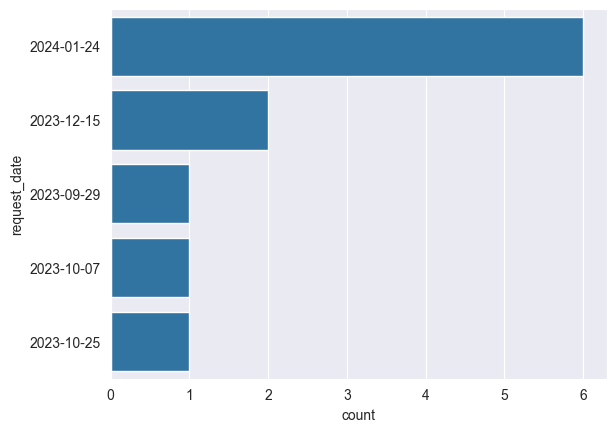

Column hs_code has 10 unique values


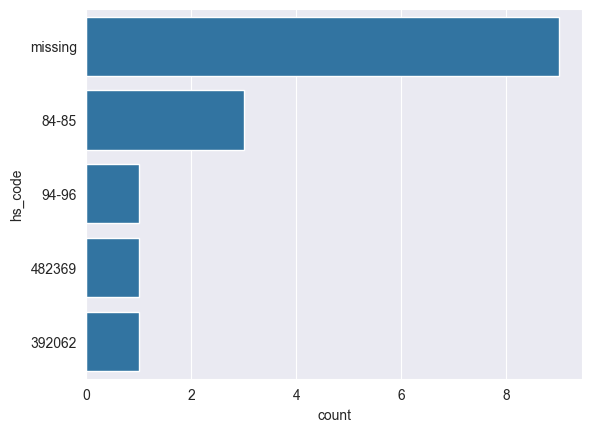

Column port_from has 10 unique values


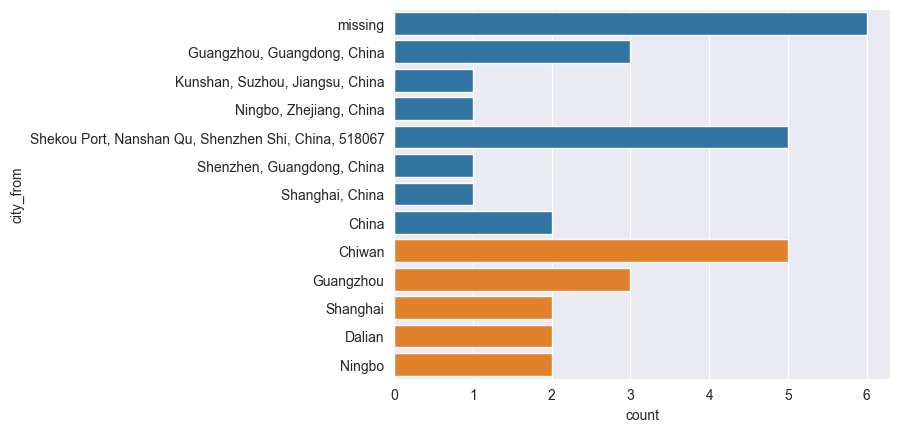

Column port_to has 12 unique values


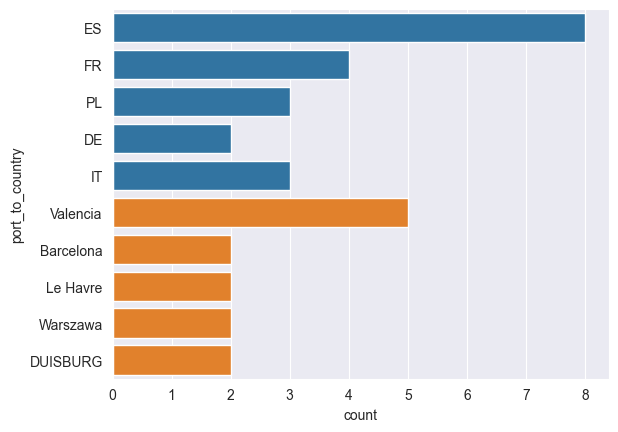

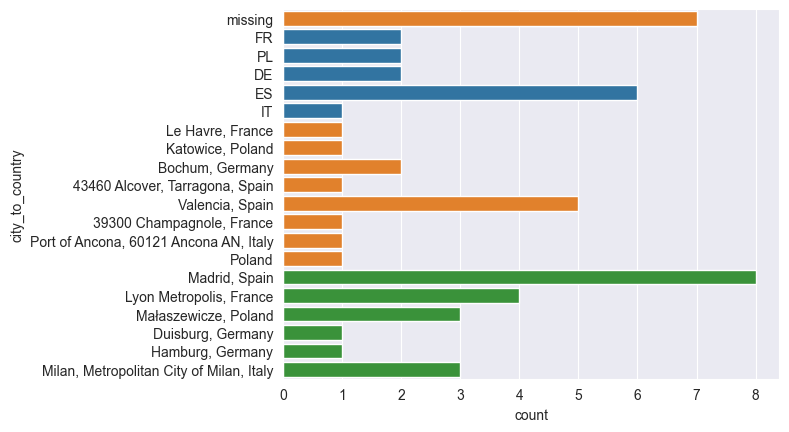

In [359]:
for col in object_cols:
    value_counts = df[col].value_counts()
    unique_values = len(value_counts)
    if unique_values < 10:
        sns.countplot(y=col, data=df)
    else:
        N = 5
        top_N = value_counts[:N]
        other = value_counts[N:].sum()
        sns.countplot(y=col, data=df, order=top_N.index)
        print(f'Column {col} has {unique_values} unique values')
        plt.show()



In [360]:
#save to csv
df.to_csv('data/merged_leads_land_not_null.csv', index=False)

In [361]:
df.columns

Index(['request_date', 'weight', 'amount', 'hs_code', 'freight_all_kinds',
       'city_from', 'port_from', 'port_to_country', 'port_to',
       'city_to_country', 'city_to', 'destination_name', 'price_usd',
       'valid_days'],
      dtype='object')

In [362]:
numeric_cols = df.select_dtypes(include=['int', 'float']).columns


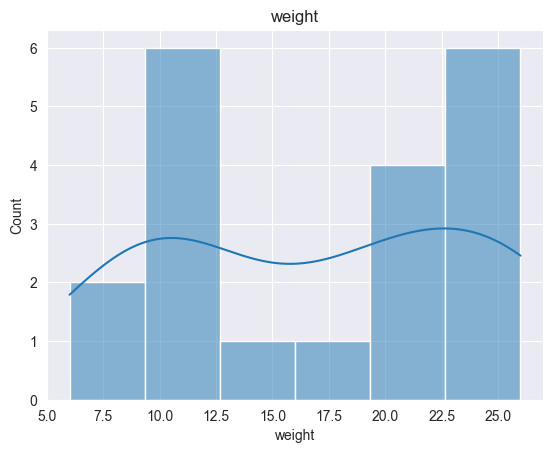

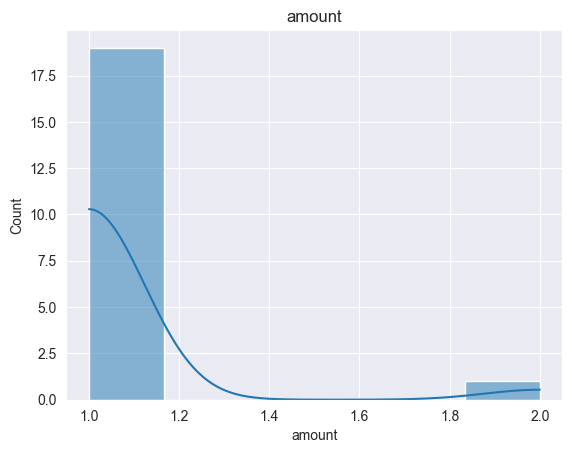

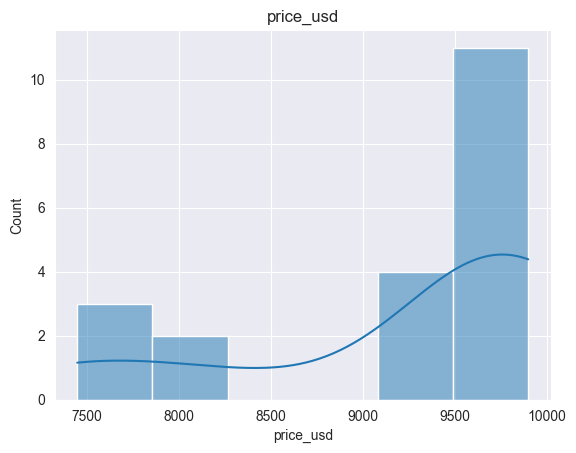

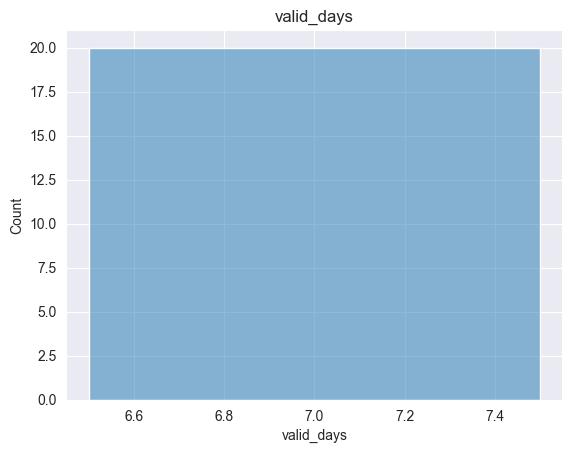

In [363]:
for col in numeric_cols:
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.show()


In [364]:
y_name = 'price_usd'
X = df.drop(columns=[y_name])
y = df[y_name]


In [365]:
X.head()

,request_date,weight,amount,hs_code,freight_all_kinds,city_from,port_from,port_to_country,port_to,city_to_country,city_to,destination_name,valid_days
897,2023-09-29,25.0,1.0,94-96,False,missing,Shanghai,ES,Barcelona,missing,missing,"Madrid, Spain",7
1116,2023-10-07,6.0,1.0,84-85,False,"Guangzhou, Guangdong, China",Guangzhou,FR,Le Havre,FR,"Le Havre, France","Lyon Metropolis, France",7
1756,2023-10-25,7.0,1.0,482369,False,missing,Dalian,FR,Le Havre,missing,missing,"Lyon Metropolis, France",7
1983,2023-11-01,24.0,1.0,392062,False,missing,Dalian,ES,Barcelona,missing,missing,"Madrid, Spain",7
2412,2023-11-20,20.0,1.0,842951,False,"Kunshan, Suzhou, Jiangsu, China",Suzhou,PL,Warszawa,PL,"Katowice, Poland","Małaszewicze, Poland",7


In [366]:
def normalize(X_train, X_test):
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled


In [367]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [368]:
drop_columns = ['valid_days']
numeric_cols = [col for col in X.columns if col != y_name and X[col].dtype in ['int', 'float']]
numeric_cols = [col for col in numeric_cols if col not in drop_columns]

In [369]:
X_train

,request_date,weight,amount,hs_code,freight_all_kinds,city_from,port_from,port_to_country,port_to,city_to_country,city_to,destination_name,valid_days
3961,2024-01-03,20.00,1.0,missing,True,missing,Ningbo,PL,Gdansk,missing,missing,"Małaszewicze, Poland",7
3188,2023-12-15,20.00,1.0,missing,True,"Guangzhou, Guangdong, China",Guangzhou,DE,DUISBURG,DE,"Bochum, Germany","Duisburg, Germany",7
5888,2024-01-24,10.46,1.0,missing,True,"Shekou Port, Nanshan Qu, Shenzhen Shi, China, ...",Chiwan,ES,Valencia,ES,"Valencia, Spain","Madrid, Spain",7
1983,2023-11-01,24.00,1.0,392062,False,missing,Dalian,ES,Barcelona,missing,missing,"Madrid, Spain",7
8797,2024-02-26,26.00,1.0,441810,False,China,Sanshui,IT,Napoli,missing,missing,"Milan, Metropolitan City of Milan, Italy",7
6879,2024-01-29,26.00,2.0,missing,True,"Shenzhen, Guangdong, China",Shenzhen,IT,Ancona,IT,"Port of Ancona, 60121 Ancona AN, Italy","Milan, Metropolitan City of Milan, Italy",7
5891,2024-01-24,10.46,1.0,missing,True,"Shekou Port, Nanshan Qu, Shenzhen Shi, China, ...",Chiwan,ES,Valencia,ES,"Valencia, Spain","Madrid, Spain",7
1756,2023-10-25,7.00,1.0,482369,False,missing,Dalian,FR,Le Havre,missing,missing,"Lyon Metropolis, France",7
4504,2024-01-12,25.00,1.0,39-40,False,missing,Nantong,IT,Genova,missing,missing,"Milan, Metropolitan City of Milan, Italy",7
9838,2024-03-05,18.00,1.0,84-85,False,China,Sanshui,PL,Warszawa,PL,Poland,"Małaszewicze, Poland",7


In [370]:
X_train_scaled, X_test_scaled = normalize(X_train[numeric_cols], X_test[numeric_cols])


In [371]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=numeric_cols)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=numeric_cols)


In [372]:
X_train_scaled

,weight,amount
0,0.684211,0.0
1,0.684211,0.0
2,0.182105,0.0
3,0.894737,0.0
4,1.000000,0.0
5,1.000000,1.0
6,0.182105,0.0
7,0.000000,0.0
8,0.947368,0.0
9,0.578947,0.0


<Axes: >

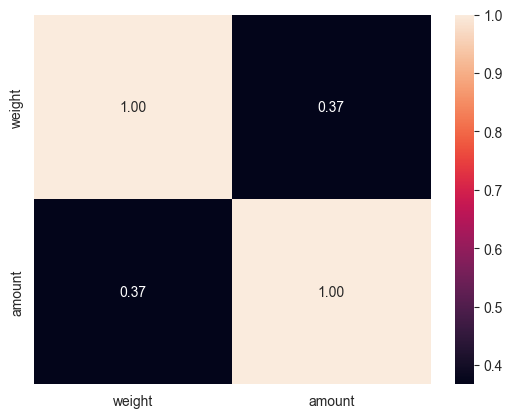

In [373]:
corr = X_train_scaled.corr()
sns.heatmap(corr, annot=True, fmt='.2f')


In [374]:
def perform_chi2_test(df: pd.DataFrame, alpha: float = 0.05) -> Dict[str, Tuple[float, float, int, bool]]:
    chi2_results = {}  # Словарь для хранения результатов теста chi2 для каждой пары столбцов

    columns = df.select_dtypes(include=['object']).columns  # Выбираем только категориальные столбцы
    for i in range(len(columns)):
        for j in range(i + 1, len(columns)):  # Обрабатываем каждую уникальную пару столбцов
            col1, col2 = columns[i], columns[j]
            contingency_table = pd.crosstab(df[col1], df[col2])  # Создаем таблицу сопряженности
            chi2_stat, p_value, dof, _ = chi2_contingency(contingency_table)  # Выполняем тест chi2
            is_significant = p_value < alpha  # Определяем, является ли результат статистически значимым
            chi2_results[f'{col1} vs {col2}'] = (chi2_stat, p_value, dof, is_significant)  # Сохраняем результаты теста chi2

    return chi2_results


chi2_results = perform_chi2_test(X_train, alpha=0.05)
for pair, result in chi2_results.items():
    chi2_stat, p_value, dof, is_significant = result
    print(f'Результат {pair}:\nChi2 Stat: {chi2_stat}, P Value: {p_value}, Degrees of Freedom: {dof}, Significant: {is_significant}\n')

Результат request_date vs hs_code:
Chi2 Stat: 112.0, P Value: 0.0010682661779603812, Degrees of Freedom: 70, Significant: True

Результат request_date vs city_from:
Chi2 Stat: 90.24000000000001, P Value: 0.007003537193653735, Degrees of Freedom: 60, Significant: True

Результат request_date vs port_from:
Chi2 Stat: 112.0, P Value: 0.010567980009176981, Degrees of Freedom: 80, Significant: True

Результат request_date vs port_to_country:
Chi2 Stat: 64.00000000000001, P Value: 0.00934187979897621, Degrees of Freedom: 40, Significant: True

Результат request_date vs port_to:
Chi2 Stat: 144.0, P Value: 0.00026209297550216885, Degrees of Freedom: 90, Significant: True

Результат request_date vs city_to_country:
Chi2 Stat: 64.0, P Value: 0.009341879798976147, Degrees of Freedom: 40, Significant: True

Результат request_date vs city_to:
Chi2 Stat: 96.0, P Value: 0.0021782051808705116, Degrees of Freedom: 60, Significant: True

Результат request_date vs destination_name:
Chi2 Stat: 63.99999999

In [375]:
#create new columnn
# df['valid_days'] = pd.to_datetime(df['valid_to']) - pd.to_datetime(df['valid_from'])
# df['valid_days'] = df['valid_days'].dt.days
# df = df.drop(columns=['valid_to', 'valid_from'])


In [376]:
#columns to drop
columns_to_drop = ['request_date', 'valid_from', 'valid_to']


In [377]:
df.head()

,request_date,weight,amount,hs_code,freight_all_kinds,city_from,port_from,port_to_country,port_to,city_to_country,city_to,destination_name,price_usd,valid_days
897,2023-09-29,25.0,1.0,94-96,False,missing,Shanghai,ES,Barcelona,missing,missing,"Madrid, Spain",9900.0,7
1116,2023-10-07,6.0,1.0,84-85,False,"Guangzhou, Guangdong, China",Guangzhou,FR,Le Havre,FR,"Le Havre, France","Lyon Metropolis, France",9450.0,7
1756,2023-10-25,7.0,1.0,482369,False,missing,Dalian,FR,Le Havre,missing,missing,"Lyon Metropolis, France",9450.0,7
1983,2023-11-01,24.0,1.0,392062,False,missing,Dalian,ES,Barcelona,missing,missing,"Madrid, Spain",9900.0,7
2412,2023-11-20,20.0,1.0,842951,False,"Kunshan, Suzhou, Jiangsu, China",Suzhou,PL,Warszawa,PL,"Katowice, Poland","Małaszewicze, Poland",7450.0,7


In [378]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
import logging
# make_column_selector
from sklearn.compose import make_column_selector

# Setup logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

def frequency_encoding_transform(X):
    df = pd.DataFrame(X)
    for column in df.columns:
        freq = df[column].value_counts(normalize=True)
        df[column] = df[column].map(freq)
    return df.values

def compare_algorithms(df, target_column, test_size=0.2, random_state=42, sort_by='R2 Score', cardinality_threshold=10):
    logging.info("Starting algorithm comparison...")
    df = df.select_dtypes(exclude=['datetime', 'datetimetz'])  # Exclude date columns

    numeric_cols = make_column_selector(dtype_include=np.number)
    categorical_cols = make_column_selector(dtype_include=object)
    high_cardinality_cols = lambda X: [col for col in categorical_cols(X) if X[col].nunique() > cardinality_threshold]
    low_cardinality_cols = lambda X: [col for col in categorical_cols(X) if X[col].nunique() <= cardinality_threshold]

    X = df.drop(columns=[target_column])
    y = df[target_column]

    numerical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())])
    low_cardinality_transformer = OneHotEncoder(handle_unknown='ignore')
    high_cardinality_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('freq_enc', FunctionTransformer(frequency_encoding_transform, validate=False))])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numeric_cols),
            ('low_card_cat', low_cardinality_transformer, low_cardinality_cols),
            ('high_card_cat', high_cardinality_transformer, high_cardinality_cols)
        ], remainder='drop')

    models = [
        LinearRegression(),
        Ridge(),
        Lasso(),
        RandomForestRegressor(),
        DecisionTreeRegressor(),
        XGBRegressor(),
        AdaBoostRegressor(),
        GradientBoostingRegressor()
    ]

    results = []
    for model in models:
        try:
            model_name = model.__class__.__name__
            logging.info(f"Training {model_name}...")
            pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                       ('model', model)])
            pipeline.fit(X, y)
            y_pred = pipeline.predict(X)

            mse = mean_squared_error(y, y_pred)
            mae = mean_absolute_error(y, y_pred)
            r2 = r2_score(y, y_pred)

            results.append({
                'Model': model_name,
                'MSE': mse,
                'MAE': mae,
                'R2 Score': r2
            })
        except Exception as e:
            logging.error(f"Error training {model_name}: {e}")

    result_df = pd.DataFrame(results)
    if not result_df.empty and sort_by in result_df.columns:
        result_df = result_df.sort_values(by=sort_by, ascending=False)
    else:
        logging.warning(f"Results DataFrame is empty or does not contain the column '{sort_by}'.")

    logging.info("Completed algorithm comparison.")
    return result_df

# Assuming df is your DataFrame and 'price' is your target column
result_df = compare_algorithms(df, 'price_usd')
print(result_df)


2024-04-30 21:18:26,445 - INFO - Starting algorithm comparison...
2024-04-30 21:18:26,448 - INFO - Training LinearRegression...
2024-04-30 21:18:26,487 - INFO - Training Ridge...
2024-04-30 21:18:26,524 - INFO - Training Lasso...
2024-04-30 21:18:26,558 - INFO - Training RandomForestRegressor...
2024-04-30 21:18:26,738 - INFO - Training DecisionTreeRegressor...
2024-04-30 21:18:26,774 - INFO - Training XGBRegressor...
2024-04-30 21:18:26,958 - INFO - Training AdaBoostRegressor...
2024-04-30 21:18:27,157 - INFO - Training GradientBoostingRegressor...
2024-04-30 21:18:27,258 - INFO - Completed algorithm comparison.


                       Model           MSE        MAE  R2 Score
4      DecisionTreeRegressor  0.000000e+00   0.000000  1.000000
0           LinearRegression  4.569377e-07   0.000568  1.000000
5               XGBRegressor  1.239777e-06   0.001074  1.000000
7  GradientBoostingRegressor  9.660988e-04   0.027511  1.000000
2                      Lasso  2.612017e+01   4.000246  0.999967
6          AdaBoostRegressor  6.795918e+01   2.571429  0.999915
1                      Ridge  7.519275e+03  62.929633  0.990606
3      RandomForestRegressor  2.706361e+04  91.175000  0.966191


In [379]:
result_df

,Model,MSE,MAE,R2 Score
4,DecisionTreeRegressor,0.000000e+00,0.000000,1.000000
0,LinearRegression,4.569377e-07,0.000568,1.000000
5,XGBRegressor,1.239777e-06,0.001074,1.000000
7,GradientBoostingRegressor,9.660988e-04,0.027511,1.000000
2,Lasso,2.612017e+01,4.000246,0.999967
6,AdaBoostRegressor,6.795918e+01,2.571429,0.999915
1,Ridge,7.519275e+03,62.929633,0.990606
3,RandomForestRegressor,2.706361e+04,91.175000,0.966191


# K-means

In [380]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
# KMeans
from sklearn.cluster import KMeans

2024-04-30 21:18:27,292 - INFO - Starting preprocessing...
2024-04-30 21:18:27,309 - INFO - Data preprocessing completed.
2024-04-30 21:18:27,318 - INFO - Clustering completed.


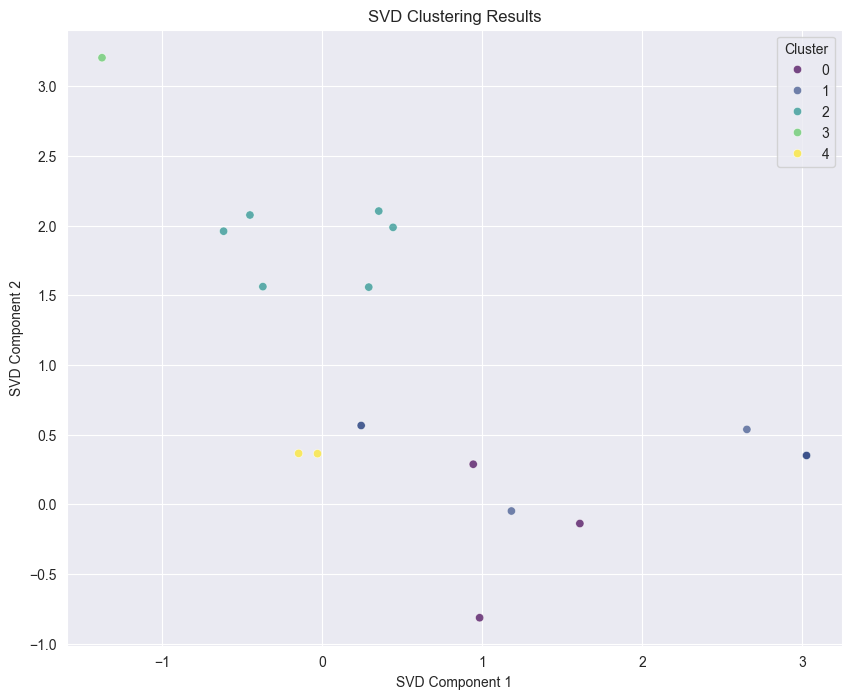

Clustering and visualization successful.


In [381]:
from sklearn.decomposition import TruncatedSVD

def preprocess_and_cluster(df, n_clusters=5):
    logging.info("Starting preprocessing...")

    try:
        # Define selectors for different data types
        numeric_cols = make_column_selector(dtype_include=np.number)
        categorical_cols = make_column_selector(dtype_include=object)

        # Numeric preprocessing: imputation + scaling
        numeric_transformer = Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ])

        # Categorical preprocessing: imputation + one-hot encoding
        categorical_transformer = Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=True))
        ])

        # Combine preprocessing
        preprocessor = ColumnTransformer([
            ('num', numeric_transformer, numeric_cols),
            ('cat', categorical_transformer, categorical_cols)
        ])

        # Apply preprocessing
        X = preprocessor.fit_transform(df.drop(['price_usd'], axis=1))  # Assuming 'price_usd' is the target/irrelevant column
        logging.info("Data preprocessing completed.")

        # Clustering
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        clusters = kmeans.fit_predict(X)
        df['Cluster'] = clusters  # Adding cluster labels to the dataframe
        logging.info("Clustering completed.")

        # Dimensionality reduction for visualization using TruncatedSVD
        svd = TruncatedSVD(n_components=2, random_state=42)
        principal_components = svd.fit_transform(X)
        df['SVD1'] = principal_components[:, 0]
        df['SVD2'] = principal_components[:, 1]

        # Visualization
        plt.figure(figsize=(10, 8))
        sns.scatterplot(x='SVD1', y='SVD2', hue='Cluster', data=df, palette='viridis', alpha=0.7)
        plt.title('SVD Clustering Results')
        plt.xlabel('SVD Component 1')
        plt.ylabel('SVD Component 2')
        plt.legend(title='Cluster')
        plt.show()

        return df

    except Exception as e:
        logging.error(f"Error during preprocessing and clustering: {e}")
        return None

# Example usage
clustered_df = preprocess_and_cluster(df, n_clusters=5)
if clustered_df is not None:
    print("Clustering and visualization successful.")
else:
    print("An error occurred.")


# Reinforcement Learning

In [382]:
# Шаг 1: Интеграция и предварительная обработка данных
# Сначала нам необходимо объединить ваши данные по отправлениям с тарифами на транспортировку. Это позволит агенту обучения с подкреплением понять доступные варианты для каждого запроса на отправку и их последствия с точки зрения стоимости и времени.


In [383]:
# Пример объединения данных по отправлениям с тарифами на авиаперевозки
# Вам нужно будет выполнить аналогичное объединение для тарифов на наземные и морские перевозки
merged_leads_land_not_null


,request_id,request_date,valid_date_from,valid_date_to,weight,weight_unit,amount,container_type,shipping_type_x,hs_code,...,city_to,create_date,valid_from,valid_to,estimated_days,origin_name,destination_name,shipping_type_y,load_amount,price_usd
897,867146,2023-09-29,2023-10-01,2023-10-08,25.00,Metric Ton,1.0,40' Standard,FCL,94-96,...,NaN,2023-11-28,2023-11-28,2023-12-31,NaN,"Wuhan, Hubei, China","Madrid, Spain",RAIL_FCL,1.0,9900.0
1116,870321,2023-10-07,2023-10-25,2023-11-01,6.00,Metric Ton,1.0,40' Standard,FCL,84-85,...,"Le Havre, France",2023-11-28,2023-11-28,2023-12-31,NaN,"Wuhan, Hubei, China","Lyon Metropolis, France",RAIL_FCL,1.0,9450.0
1756,878371,2023-10-25,2023-11-26,2023-12-03,7.00,Metric Ton,1.0,40' Standard,FCL,482369,...,NaN,2023-11-28,2023-11-28,2023-12-31,NaN,"Wuhan, Hubei, China","Lyon Metropolis, France",RAIL_FCL,1.0,9450.0
1983,881615,2023-11-01,2023-11-30,2023-12-07,24.00,Metric Ton,1.0,40' Standard,FCL,392062,...,NaN,2023-11-28,2023-11-28,2023-12-31,NaN,"Wuhan, Hubei, China","Madrid, Spain",RAIL_FCL,1.0,9900.0
2412,887094,2023-11-20,2023-11-30,2023-12-07,20.00,Metric Ton,1.0,40' Standard,FCL,842951,...,"Katowice, Poland",2023-11-28,2023-11-28,2023-12-31,NaN,"Wuhan, Hubei, China","Małaszewicze, Poland",RAIL_FCL,1.0,7450.0
3188,896859,2023-12-15,2023-12-15,2023-12-22,20.00,Metric Ton,1.0,40' Standard,FCL,NaN,...,"Bochum, Germany",2023-11-28,2023-11-28,2023-12-31,NaN,"Wuhan, Hubei, China","Duisburg, Germany",RAIL_FCL,1.0,8250.0
3189,896859,2023-12-15,2023-12-15,2023-12-22,20.00,Metric Ton,1.0,40' Standard,FCL,NaN,...,"Bochum, Germany",2023-11-28,2023-11-28,2023-12-31,NaN,"Wuhan, Hubei, China","Hamburg, Germany",RAIL_FCL,1.0,8250.0
3838,903961,2024-01-02,2024-01-10,2024-01-17,10.00,Metric Ton,1.0,40' Standard,FCL,761699,...,"43460 Alcover, Tarragona, Spain",2023-11-28,2023-11-28,2023-12-31,NaN,"Wuhan, Hubei, China","Madrid, Spain",RAIL_FCL,1.0,9900.0
3961,904991,2024-01-03,2024-01-09,2024-01-16,20.00,Metric Ton,1.0,40' Standard,FCL,NaN,...,NaN,2023-11-28,2023-11-28,2023-12-31,NaN,"Wuhan, Hubei, China","Małaszewicze, Poland",RAIL_FCL,1.0,7450.0
4504,910119,2024-01-12,2024-01-31,2024-02-07,25.00,Metric Ton,1.0,40' Standard,FCL,39-40,...,NaN,2023-11-28,2023-11-28,2023-12-31,NaN,"Wuhan, Hubei, China","Milan, Metropolitan City of Milan, Italy",RAIL_FCL,1.0,9750.0


In [384]:
merged_leads_land_not_null.columns

Index(['request_id', 'request_date', 'valid_date_from', 'valid_date_to',
       'weight', 'weight_unit', 'amount', 'container_type', 'shipping_type_x',
       'hs_code', 'freight_all_kinds', 'personal_cargo', 'perishable_cargo',
       'liquid_cargo', 'imo_code', 'city_from_country', 'city_from',
       'port_from_country', 'port_from', 'port_to_country', 'port_to',
       'city_to_country', 'city_to', 'create_date', 'valid_from', 'valid_to',
       'estimated_days', 'origin_name', 'destination_name', 'shipping_type_y',
       'load_amount', 'price_usd'],
      dtype='object')

In [385]:
# Шаг 2: Определение пространства состояний
# Состояние может включать различные характеристики из объединенного набора данных, такие как:
#
# Информация об отправлении и назначении
# Вес и тип контейнера
# Дата запроса и диапазон действительных дат
# Любые другие релевантные детали отправления
# Вам может потребоваться закодировать эти характеристики в числовой формат, подходящий для алгоритма обучения с подкреплением.
#
# Шаг 3: Определение пространства действий
# Пространство действий будет состоять из выбора одного из доступных методов транспортировки (и потенциально конкретных вариантов в рамках этих методов, таких как перевозчики или маршруты). Если вы объединили данные по всем типам транспортировки, действие на каждом шаге будет заключаться в выборе строки (то есть конкретного тарифа и метода транспортировки).
#
# Шаг 4: Определение функции вознаграждения
# Функция вознаграждения должна мотивировать агента минимизировать стоимость и время, учитывая другие факторы, такие как надежность или воздействие на окружающую среду. Например:
#
# Вознаграждение = - (Нормализованная стоимость + Нормализованное время)
# Вы можете ввести штрафы за позднюю дШаг 2: Определение пространства состояний
# Состояние может включать различные характеристики из объединенного набора данных, такие как:
#
# Информация об отправлении и назначении
# Вес и тип контейнера
# Дата запроса и диапазон действительных дат
# Любые другие релевантные детали отправления
# Вам может потребоваться закодировать эти характеристики в числовой формат, подходящий для алгоритма обучения с подкреплением.
#
# Шаг 3: Определение пространства действий
# Пространство действий будет состоять из выбора одного из доступных методов транспортировки (и потенциально конкретных вариантов в рамках этих методов, таких как перевозчики или маршруты). Если вы объединили данные по всем типам транспортировки, действие на каждом шаге будет заключаться в выборе строки (то есть конкретного тарифа и метода транспортировки).
#
# Шаг 4: Определение функции вознаграждения
# Функция вознаграждения должна мотивировать агента минимизировать стоимость и время, учитывая другие факторы, такие как надежность или воздействие на окружающую среду. Например:
#
# Вознаграждение = - (Нормализованная стоимость + Нормализованное время)
# Вы можете ввести штрафы за позднюю доставку или бонусы за выбор экологически чистых вариантов.
#
# Шаг 5: Обучение агента RL
# Вы можете использовать Q-learning, SARSA или Deep Q-Networks (DQN) для обучения вашего агента. Выбор алгоритма зависит от сложности вашего пространства состояний и действий. Если они очень большие, вам может потребоваться использовать DQN или другие методы, основанные на глубоком обучении.оставку или бонусы за выбор экологически чистых вариантов.
#
# Шаг 5: Обучение агента RL
# Вы можете использовать Q-learning, SARSA или Deep Q-Networks (DQN) для обучения вашего агента. Выбор алгоритма зависит от сложности вашего пространства состояний и действий. Если они очень большие, вам может потребоваться использовать DQN или другие методы, основанные на глубоком обучении.
# Шаг 6: Оценка агента
# После обучения вы должны оценить эффективность вашего агента с точки зрения общих вознаграждений и сравнить его с базовыми стратегиями, такими как всегда выбирать самый дешевый или самый быстрый вариант.
#
# Реализация среды RL
# Реализация среды RL (env) требует определения поведения функций reset() и step(action), которое, в свою очередь, зависит от того, как вы структурировали свои пространства состояний и действий и интегрировали свои данные.


In [386]:
import numpy as np
import pandas as pd

class LogisticsEnv:
    def __init__(self, data):
        self.data = data
        self.n_steps = data.shape[0]
        self.current_step = None
        self.done = None
        self.total_rewards = None
        self.reset()

    def reset(self):
        self.current_step = 0
        self.done = False
        self.total_rewards = 0
        return self.current_step

    def step(self, action):
        reward = -self.data.iloc[self.current_step]['price_usd']
        self.total_rewards += reward

        self.current_step += 1
        if self.current_step >= self.n_steps:
            self.done = True
            self.current_step = self.n_steps - 1  # Удерживаем индекс в пределах диапазона

        return self.current_step, reward, self.done, {}

class QLearningAgent:
    def __init__(self, n_states, n_actions, lr=0.1, gamma=0.99, epsilon=0.1):
        self.n_states = n_states
        self.n_actions = n_actions
        self.lr = lr
        self.gamma = gamma
        self.epsilon = epsilon
        self.q_table = np.zeros((n_states, n_actions))

    def choose_action(self, state_index):
        if np.random.uniform(0, 1) < self.epsilon:
            return np.random.choice(self.n_actions)
        else:
            return np.argmax(self.q_table[state_index])

    def update_q_table(self, state_index, action, reward, next_state_index, done):
        if not done:
            best_next_action = np.argmax(self.q_table[next_state_index])
            td_target = reward + self.gamma * self.q_table[next_state_index, best_next_action]
        else:
            td_target = reward  # Если эпизод завершен, цель для TD обновления - просто полученная награда

        td_error = td_target - self.q_table[state_index, action]
        self.q_table[state_index, action] += self.lr * td_error

# Создание среды и агента
env = LogisticsEnv(merged_leads_land_not_null)
agent = QLearningAgent(n_states=env.n_steps, n_actions=3)  # Предполагаем 3 возможных действия

# Процесс обучения агента
n_episodes = 100
for episode in range(n_episodes):
    state_index = env.reset()
    done = False

    while not done:
        action = agent.choose_action(state_index)
        next_state_index, reward, done, _ = env.step(action)
        agent.update_q_table(state_index, action, reward, next_state_index, done)
        if not done:
            state_index = next_state_index


In [387]:
# 1. Оценка средней награды
total_rewards = []
for episode in range(n_episodes):
    state = env.reset()
    done = False
    total_reward = 0

    while not done:
        action = agent.choose_action(state)
        state, reward, done, _ = env.step(action)
        total_reward += reward

    total_rewards.append(total_reward)

average_reward = sum(total_rewards) / n_episodes
print(f"Средняя награда за эпизод: {average_reward}")



Средняя награда за эпизод: -185100.0


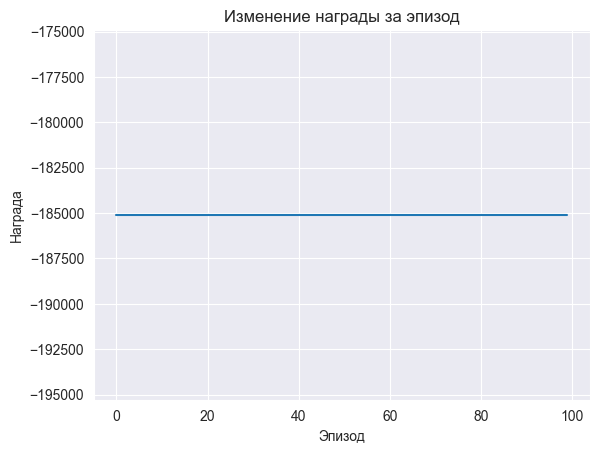

In [388]:
# 2. Визуализация изменения награды
import matplotlib.pyplot as plt

plt.plot(total_rewards)
plt.title('Изменение награды за эпизод')
plt.xlabel('Эпизод')
plt.ylabel('Награда')
plt.show()


In [389]:
# 3. Проверка стратегии агента
for state_index in range(env.n_steps):
    best_action = np.argmax(agent.q_table[state_index])
    print(f"Лучшее действие для состояния {state_index} - {best_action}")


Лучшее действие для состояния 0 - 0
Лучшее действие для состояния 1 - 0
Лучшее действие для состояния 2 - 1
Лучшее действие для состояния 3 - 0
Лучшее действие для состояния 4 - 0
Лучшее действие для состояния 5 - 2
Лучшее действие для состояния 6 - 1
Лучшее действие для состояния 7 - 1
Лучшее действие для состояния 8 - 0
Лучшее действие для состояния 9 - 0
Лучшее действие для состояния 10 - 1
Лучшее действие для состояния 11 - 1
Лучшее действие для состояния 12 - 2
Лучшее действие для состояния 13 - 0
Лучшее действие для состояния 14 - 2
Лучшее действие для состояния 15 - 1
Лучшее действие для состояния 16 - 0
Лучшее действие для состояния 17 - 1
Лучшее действие для состояния 18 - 1
Лучшее действие для состояния 19 - 1
